<a href="https://colab.research.google.com/github/Progpr/ML-mini-projects/blob/main/Cool_Beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [ ]:
df=pd.read_csv('/content/Dry_Bean_Dataset-use.csv')
df.head()
df.info()
#a=df['Class']
#Counter(a)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']
print(X.shape,y.shape)

(13611, 16) (13611,)


In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
p=pd.DataFrame(X)
p.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,0.139320,0.226304,0.245905,0.236190,0.397295,0.768181,0.136386,0.224978,0.625380,0.900112,0.765693,0.459403,0.493356,0.371445,0.413253,0.910285
std,0.125212,0.146710,0.154332,0.133171,0.175517,0.132860,0.122744,0.144996,0.157895,0.061783,0.118786,0.177989,0.147006,0.192168,0.175392,0.083898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067926,0.122404,0.125531,0.157944,0.289902,0.717685,0.066084,0.131880,0.525344,0.880592,0.683497,0.351551,0.406860,0.190064,0.302997,0.884146
50%,0.103469,0.184992,0.204017,0.207054,0.374443,0.787743,0.100974,0.189141,0.657953,0.915228,0.785402,0.463478,0.503986,0.364216,0.410514,0.935698
75%,0.174691,0.309781,0.347394,0.279902,0.485429,0.854208,0.171533,0.289620,0.744779,0.938164,0.852681,0.558634,0.585601,0.517962,0.506118,0.964454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# normalize the data attributes
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
X = min_max_scaler.fit_transform(X)

In [ ]:
#logistic regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 7)
classifier.fit(xtrain, y_train)
y_pred = classifier.predict(xtest)

results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
LG_acc = accuracy_score(y_test, y_pred)
print ('Accuracy Score is',LG_acc)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))
#print('AUC-ROC:',roc_auc_score(y_test, y_pred))
#print('LOGLOSS Value is',log_loss(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix :
[[ 336    0   23    0    1    0   14]
 [   0  162    0    0    0    0    0]
 [  10    0  466    0   10    1    4]
 [   0    0    0 1001    0   12   76]
 [   2    0    8    5  549    0    7]
 [   3    0    0    9    0  603   27]
 [   0    0    2   59   16    8  670]]
Accuracy Score is 0.9272771792360431
Classification Report : 
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       374
      BOMBAY       1.00      1.00      1.00       162
        CALI       0.93      0.95      0.94       491
    DERMASON       0.93      0.92      0.93      1089
       HOROZ       0.95      0.96      0.96       571
       SEKER       0.97      0.94      0.95       642
        SIRA       0.84      0.89      0.86       755

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [ ]:
#svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)


results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
SVM_acc = accuracy_score(y_test, y_pred)
print ('Accuracy Score is',SVM_acc)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[344   0  28   0   1   2  15]
 [  0 153   0   0   0   0   0]
 [ 10   0 456   0   9   1   3]
 [  0   0   0 981   1  11  69]
 [  0   0   8   5 556   0  10]
 [  2   0   0  14   0 580  25]
 [  2   0   0  81  19  10 688]]
Accuracy Score is 0.9201762977473066
Classification Report : 
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.88      0.92       390
      BOMBAY       1.00      1.00      1.00       153
        CALI       0.93      0.95      0.94       479
    DERMASON       0.91      0.92      0.92      1062
       HOROZ       0.95      0.96      0.95       579
       SEKER       0.96      0.93      0.95       621
        SIRA       0.85      0.86      0.85       800

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [ ]:
#knn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)

results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
KN_acc = accuracy_score(y_test, y_pred)
print ('Accuracy Score is',KN_acc)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))


Confusion Matrix :
[[346   0  24   1   2   3  13]
 [  0 155   0   0   0   0   0]
 [ 16   0 484   0   7   2   4]
 [  0   0   0 993   2  18  54]
 [  3   0   9   8 538   0  20]
 [  6   0   0  20   1 557  14]
 [  4   0   1  88   4   3 684]]
Accuracy Score is 0.9199314397649363
Classification Report : 
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.91       389
      BOMBAY       1.00      1.00      1.00       155
        CALI       0.93      0.94      0.94       513
    DERMASON       0.89      0.93      0.91      1067
       HOROZ       0.97      0.93      0.95       578
       SEKER       0.96      0.93      0.94       598
        SIRA       0.87      0.87      0.87       784

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [ ]:
#decision tree 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)


from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
DT_acc = accuracy_score(y_test, y_pred)
print ('Accuracy Score is',DT_acc)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[373   0  20   1   5   6   8]
 [  1 152   0   0   0   0   0]
 [ 23   0 450   0  12   1   5]
 [  1   0   0 952   3  18 103]
 [  7   0  23   6 545   0  19]
 [  5   0   0  26   1 533  18]
 [ 12   0   3  94   9  25 624]]
Accuracy Score is 0.8885896180215475
Classification Report : 
              precision    recall  f1-score   support

    BARBUNYA       0.88      0.90      0.89       413
      BOMBAY       1.00      0.99      1.00       153
        CALI       0.91      0.92      0.91       491
    DERMASON       0.88      0.88      0.88      1077
       HOROZ       0.95      0.91      0.93       600
       SEKER       0.91      0.91      0.91       583
        SIRA       0.80      0.81      0.81       767

    accuracy                           0.89      4084
   macro avg       0.91      0.90      0.91      4084
weighted avg       0.89      0.89      0.89      4084



In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

from sklearn import metrics
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
RF_acc = accuracy_score(y_test,y_pred)
print ('Accuracy Score is',RF_acc)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[379   0  20   0   2   2  10]
 [  0 153   0   0   0   0   0]
 [ 12   0 463   0   9   1   6]
 [  0   0   0 991   0  18  68]
 [  4   0  14   7 564   0  11]
 [  5   0   0  21   0 542  15]
 [  3   0   2  81  13  15 653]]
Accuracy Score is 0.9169931439764937
Classification Report : 
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       413
      BOMBAY       1.00      1.00      1.00       153
        CALI       0.93      0.94      0.94       491
    DERMASON       0.90      0.92      0.91      1077
       HOROZ       0.96      0.94      0.95       600
       SEKER       0.94      0.93      0.93       583
        SIRA       0.86      0.85      0.85       767

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [ ]:
#correlation between features 
cor_matrix = df.corr().abs() 

print(cor_matrix)

                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335         0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345   0.021160         0.078062         0.145957   
Solidity         0.196585   0.303970         0.284302         0.155831   
roundness        0.357530   0.547647         0.596358         0.210344   
Compactness      0.268067   0.406857         0.568377         0.015066   
ShapeFactor1     0.847958   0.864623  

In [ ]:
results=pd.DataFrame({'Model':['LogisticRegression','SVM','KNN','DT','RF'],
                    'Accuracy Score':[LG_acc,SVM_acc,KN_acc,DT_acc,RF_acc]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df


,Accuracy Score
Model,
LogisticRegression,0.927277
SVM,0.920176
KNN,0.919931
RF,0.918952
DT,0.891038


<Axes: >

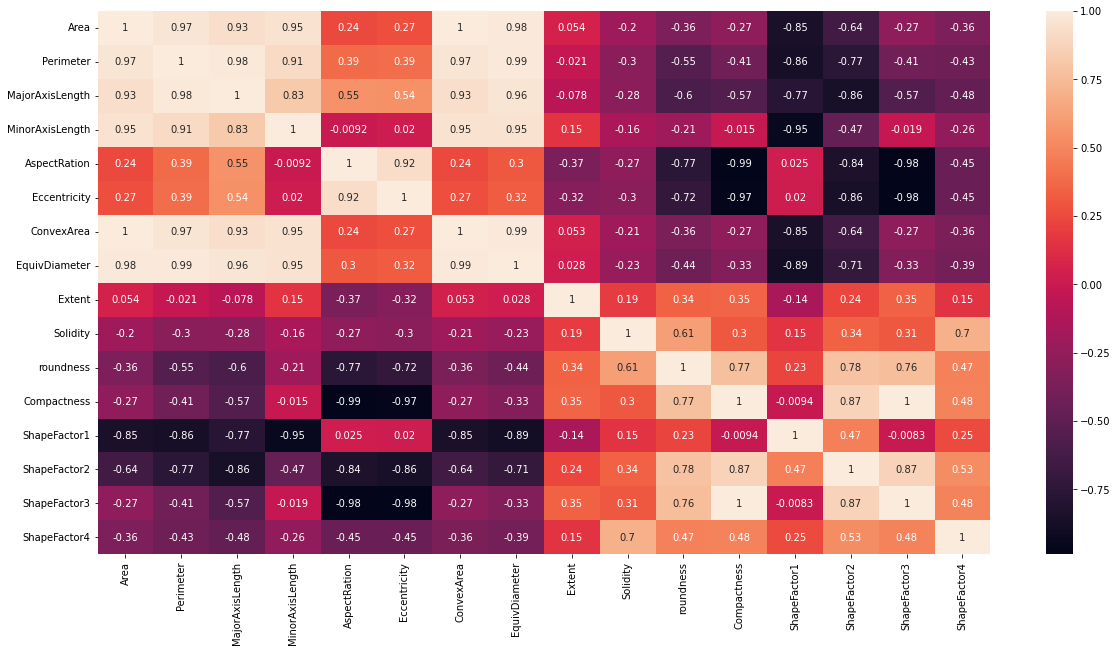

In [ ]:
plt.figure(figsize = (20,10))        
sns.heatmap(df.corr(),annot = True)

In [ ]:
tlog,tknn,tsvm,tdt,trf=

In [ ]:
'''
auc roc curve
bar graphs for performance analysis
ensemble best 3 algorithms/voting/weighted ensemble
'''